In [1]:
from utils import make_roc_curve, make_cm, sigmoid, bootstrap, get_stats, process_preds
from sklearn import metrics
import pandas as pd
from pathlib import Path

# predictions = Path('MR_model_predictions.csv')
predictions = Path('MR_model_predictions.csv')

c:\Users\Remote\Documents\Anaconda3\envs\cvair\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Remote\Documents\Anaconda3\envs\cvair\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


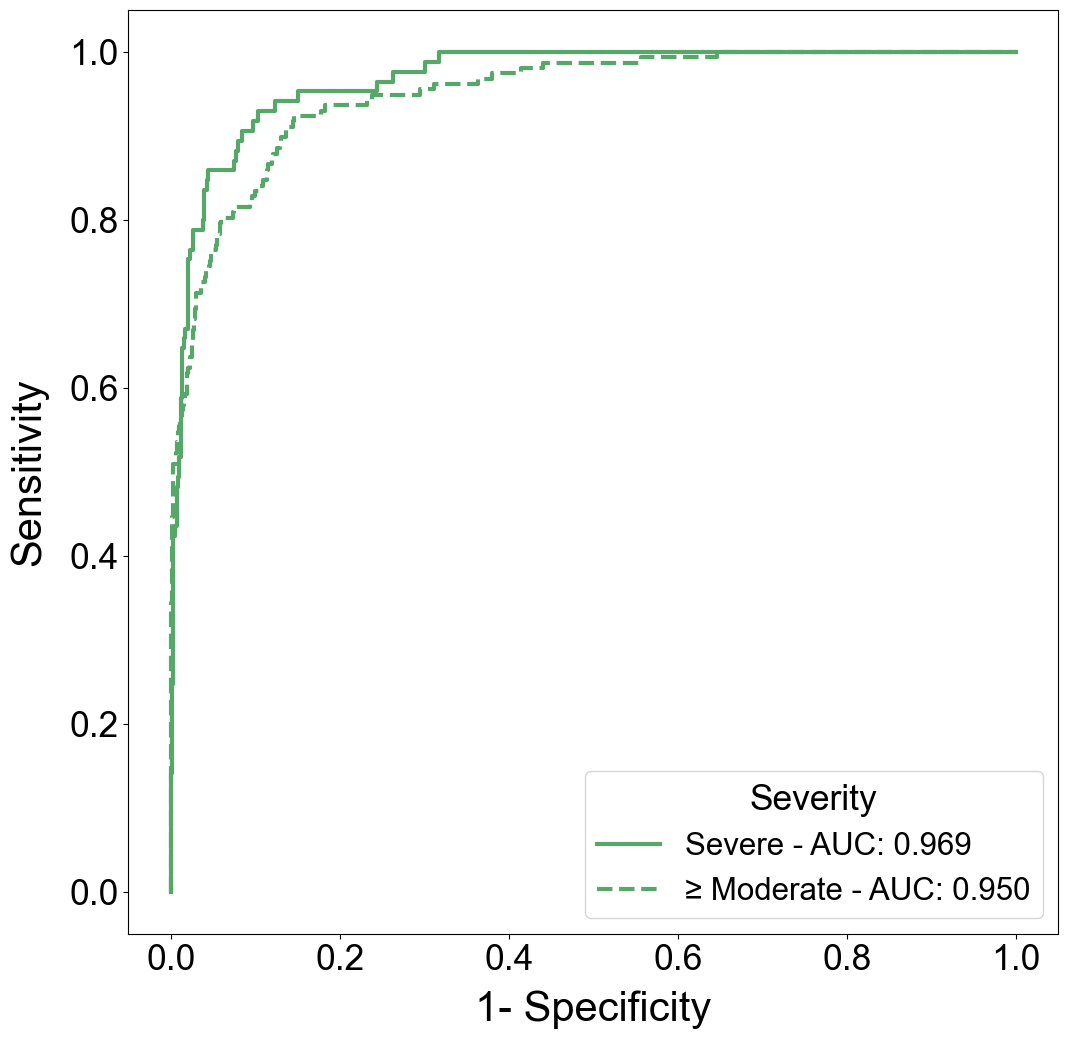

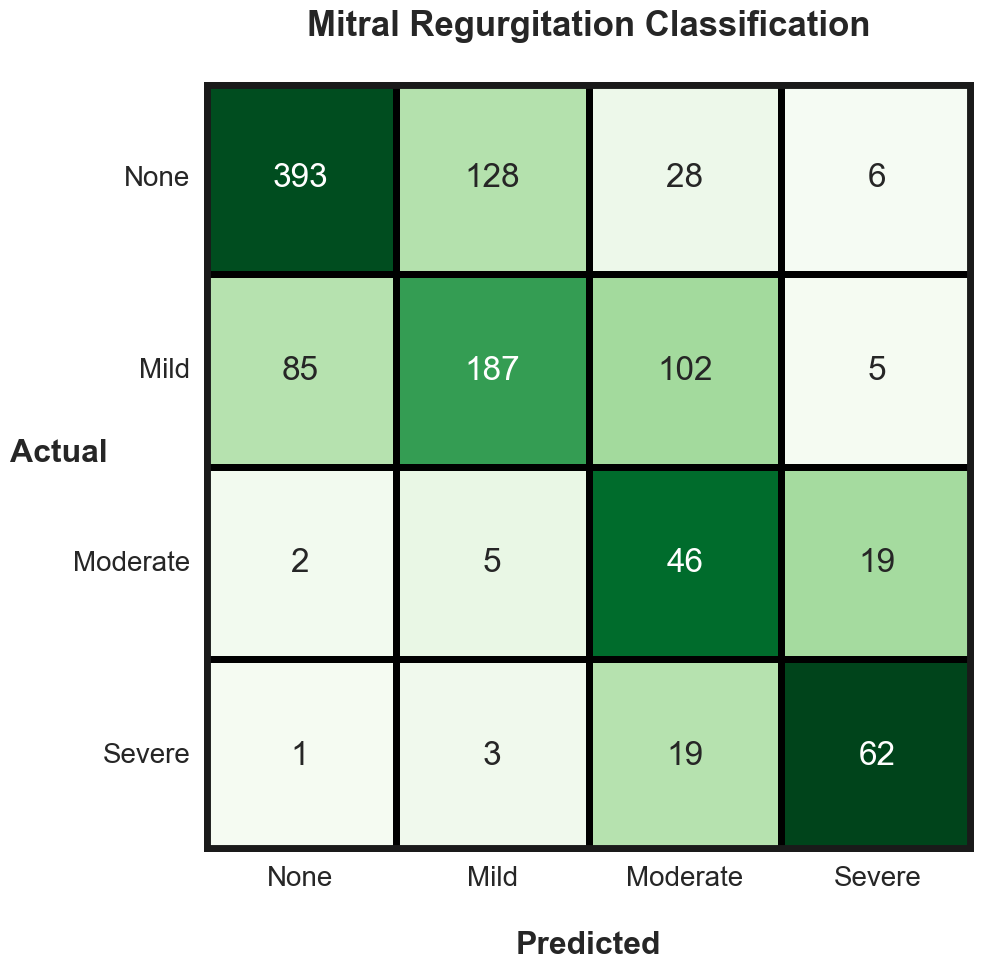

100%|██████████| 10000/10000 [01:06<00:00, 150.59it/s]


Severe MR Stats
Severe MR AUC is 0.969 [0.946, 0.986]
Severe PPV is 0.674 [0.535, 0.81]
Severe NPV is 0.977 [0.963, 0.99]
Severe Recall is 0.729 [0.588, 0.857]
Severe F1-Score is 0.701 [0.581, 0.8]


Moderate/Severe MR Stats
Moderate/Severe MR AUC is 0.951 [0.923, 0.972]
Moderate/Severe PPV is 0.509 [0.428, 0.591]
Moderate/Severe NPV is 0.986 [0.974, 0.997]
Moderate/Severe Recall is 0.93 [0.868, 0.985]
Moderate/Severe F1-Score is 0.658 [0.581, 0.727]


In [2]:
make_roc_curve(manifest)
make_cm(manifest)
get_stats(manifest)